# $B2$: Multi-Qubit XOR Oracle

## Problem Statement
You are given an integer $n$. Implement the oracle $O$ on a quantum circuit $qc$ consisting of $n+1$ qubits, and acting on the computational basis states as:

$$
\lvert \psi \rangle = \lvert x \rangle \lvert y \rangle \xrightarrow{O} \lvert x \rangle \lvert y \oplus x_1 \oplus x_2 \oplus \dots \oplus x_n \rangle.
$$

where $\lvert x \rangle = \lvert x_1, x_2, \dots, x_n \rangle$ denotes the first $n$ qubits of the circuit and $\lvert y \rangle$ denotes the last qubit.

## Sample Input
The initial state is given as:

$$
\lvert \psi \rangle = \frac{1}{\sqrt{2}} ( \lvert 101 \rangle + \lvert 010 \rangle ).
$$

The implemented oracle $O$ should perform the transformation:

$$
\frac{1}{\sqrt{2}} ( \lvert 101 \rangle + \lvert 010 \rangle ) \xrightarrow{O} \frac{1}{\sqrt{2}} ( \lvert 100 \rangle + \lvert 011 \rangle ).
$$


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister


def solve(n: int) -> QuantumCircuit:
    x, y = QuantumRegister(n), QuantumRegister(1)
    qc = QuantumCircuit(x, y)
    # Apply CX
    for i in range(n):
        qc.cx(control_qubit=x[i], target_qubit=y[0])
    return qc


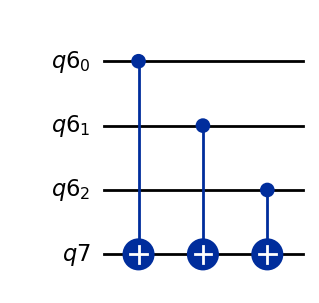

In [8]:

qc = solve(3)

qc.draw('mpl')

## Solution Approach

To implement the oracle $O$, we need to perform the transformation:

$$
\lvert \psi \rangle = \lvert x \rangle \lvert y \rangle \xrightarrow{O} \lvert x \rangle \lvert y \oplus x_1 \oplus x_2 \oplus \dots \oplus x_n \rangle.
$$

where $\oplus$ represents the XOR operation. This means that the last qubit ($y$) should be flipped if the parity (sum modulo 2) of the first $n$ qubits is 1.

### Steps:
1. **Quantum Registers**: 
   - The first $n$ qubits represent $x_1, x_2, \dots, x_n$.
   - The last qubit represents $y$.
2. **Quantum Circuit**: 
   - A quantum circuit is initialized with these $n+1$ qubits.
3. **CNOT Gate Application**: 
   - A series of controlled-NOT (CNOT) gates is applied, where each of the first $n$ qubits acts as a control and the last qubit ($y$) is the target.
   - This operation flips $y$ whenever an odd number of control qubits are in state $\lvert 1 \rangle$, implementing the required XOR operation.
4. **Final Output**: 
   - The circuit now correctly applies the transformation:

$$
\lvert x_1, x_2, \dots, x_n \rangle \lvert y \rangle \xrightarrow{CX} \lvert x_1, x_2, \dots, x_n \rangle \lvert y \oplus x_1 \oplus x_2 \oplus \dots \oplus x_n \rangle.
$$
